In [1]:
import numpy as np
import matplotlib.pyplot as plt
f = open('test_net_inference_time_distribution.txt', 'r')
lines = f.readlines()

In [2]:
height = 100
width = len([x for x in lines[0].split()])
data = np.empty((height,width))
avg_data = np.zeros((16,width))
for i in range(0,16):
    offset = i*100
    for j in range(height):
        data[j] = [float(x) for x in lines[offset+1+j].split()]
    
    #print(data)
    for j in range(1,height):
        #print(data[j][1:])
        avg_data[i] = avg_data[i] + data[j]
    avg_data[i] = avg_data[i]/(height-1)
    #print(avg_data[i])
print(avg_data)

[[0.22807076 0.00953939 0.07290726 0.00116972 0.00191793 0.0102078
  0.1301832 ]
 [0.24766448 0.00935336 0.07047039 0.00133404 0.00213388 0.01507352
  0.14697101]
 [0.24141348 0.00956338 0.06983718 0.00131136 0.0020401  0.01824939
  0.13814028]
 [0.24603463 0.00966583 0.07034133 0.00128312 0.0019446  0.01910149
  0.14154947]
 [0.24904174 0.00947551 0.07280567 0.00130405 0.00195246 0.01931468
  0.14203811]
 [0.25033867 0.00945354 0.07197975 0.00135039 0.00200487 0.01945189
  0.14383395]
 [0.23915206 0.00993933 0.06500739 0.00138725 0.00199092 0.01946759
  0.13924503]
 [0.24967868 0.00949504 0.07342049 0.00144038 0.00197766 0.01909749
  0.14209585]
 [0.24437924 0.0091195  0.06653539 0.0014566  0.00206475 0.01936928
  0.14361668]
 [0.25267377 0.01001864 0.06952846 0.00171342 0.00216378 0.01960425
  0.14730633]
 [0.25662897 0.01004615 0.07232389 0.00162925 0.0020675  0.01979504
  0.14855539]
 [0.25103281 0.00974917 0.07195715 0.00162026 0.00202755 0.01951661
  0.14396556]
 [0.24626834 0.01

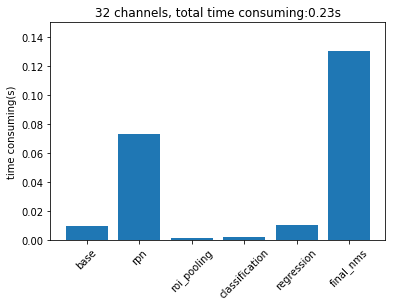

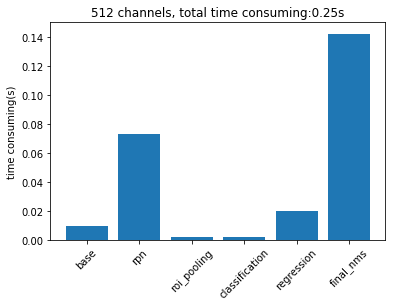

In [3]:
names = [x for x in lines[0].split()]
names = names[1:]
#print(names)
for i in [0,15]: 
    x = range(width-1)
    plt.bar(x,avg_data[i][1:])
    plt.ylim(0,0.150)
    plt.xticks(x,names,rotation = 45)
    plt.ylabel('time consuming(s)')
    plt.title(str((i+1)*32)+' channels, total time consuming:'+'%.2f' %avg_data[i][0]+'s')
    plt.savefig('inference_time_distribution_'+str((i+1)*32)+'channels.png',bbox_inches='tight')
    plt.show()

[0.22807076 0.24766448 0.24141348 0.24603463 0.24904174 0.25033867
 0.23915206 0.24967868 0.24437924 0.25267377 0.25662897 0.25103281
 0.24626834 0.24685496 0.24600979 0.24960692]


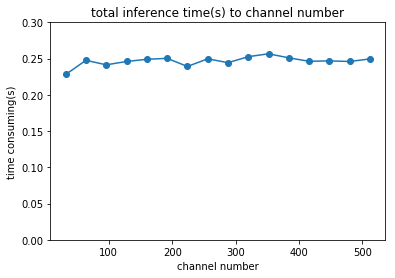

In [4]:
#names = [x for x in lines[0].split()]
x = range(32,512+32,32)
print(avg_data[:,0])
plt.plot(x,avg_data[:,0],marker = 'o')
plt.ylim(0,0.3)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('total inference time(s) to channel number')
plt.savefig('inference_time_to_channel_number.png',bbox_inches='tight')
plt.show()

In [5]:
x = range(32,512+32,32)
print(x)

range(32, 544, 32)


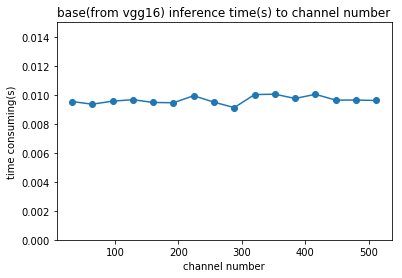

In [6]:
plt.plot(x,avg_data[:,1],marker = 'o')
plt.ylim(0,0.015)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('base(from vgg16) inference time(s) to channel number')
plt.savefig('base_time_to_channel_number.png',bbox_inches='tight')
plt.show()

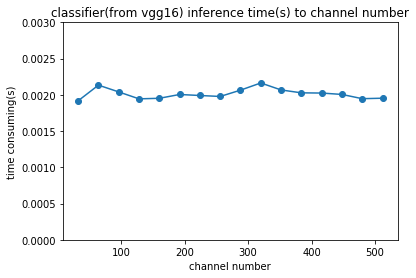

In [12]:
plt.plot(x,avg_data[:,4],marker = 'o')
plt.ylim(0,0.003)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('classifier(from vgg16) inference time(s) to channel number')
plt.savefig('classification_time_to_channel_number.png',bbox_inches='tight')
plt.show()

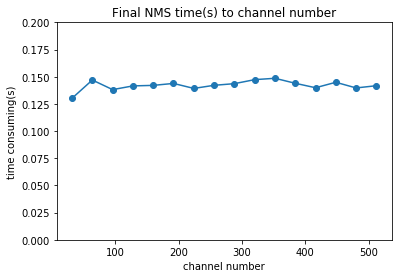

In [13]:
plt.plot(x,avg_data[:,6],marker = 'o')
plt.ylim(0,0.20)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('Final NMS time(s) to channel number')
plt.savefig('NMS_time_to_channel_number.png',bbox_inches='tight')
plt.show()